# Example 2 - Part 3
## pH-Rate Profile Example - Kirby 2002

Tony Kirby is one of the giants of physical organic and bio-organic chemistry. In this paper he follows up on a decades-long series of papers investigating the mechanism of *amylases* that catalyze the hydrolysis of acetal groups in polysaccharide chains.

This *Python* notebook will plot the integrated rate equations that were used in the paper. As you now know the equation 3 in the paper is incorrect. **Here we will derive the correct equation.**

``Concerted general acid and nucleophilic catalysis of acetalhydrolysis. A simple model for the lysozyme mechanism''. K.E.S. Deana, A.J. Kirby, *J. Chem. Soc., Perkin Trans. 2*, **2002**, 428-432. https://doi.org/10.1039/B110948K. 


## A Consecutive Reaction

For a consecutive reaction of the form...

$$\text{A} \overset{k_1}{\longrightarrow} \text{I} $$
$$\text{I} \overset{k_2}{\longrightarrow} \text{P}$$

...we can easily derive the integrated rate equations that describe the concentrations of all three species over time. These are available in any physical chemistry book (and are also derived using *Python* code is the latter part of this notebook) and are presented below...

$$
\begin{align*}
\left[ \text{A} \right]_t &= \left[ \text{A} \right]_0 e^{-k_1 t} \\
\left[\text{I} \right]_t &= \left[ \text{A} \right]_0 \frac{ k_{1} }{k_1 - k_2}\left( e^{- k_2 t} - e^{- k_1 t}\right) \\
\left[\text{P} \right]_t &= \left[ \text{A} \right]_0 \left( \left( 1 -  e^{- k_1 t} \right) - \frac{k_1}{k_1 - k_2} \left( e^{- k_2 t} - e^{- k_1 t} \right) \right)
\end{align*}
$$


## Deriving the Equations

the reaction in Kirby's system is described as...


$$\text{A} \overset{k_1}{\longrightarrow} \text{I} + \text{P}$$
$$\text{I} \overset{k_2}{\longrightarrow} \text{P}$$

This system is very similar to the simple consecutive reaction above with the additional fact that the product (P) is produced in two separate events. P will appear as part of a first-order reaction in the first step. It will also appear as a aproduct of a consecutive reaction in the second step. So the amount of product will be the sum of the two processes.

$$
\begin{align*}
\left[\text{P} \right]_t &= \left[ \text{A} \right]_0\left(1-e^{-k1 t}\right)\text{ and } \\
\left[\text{P} \right]_t &= \left[ \text{A} \right]_0 \left( \left(1 -  e^{- k_{1} t}\right) - \frac{k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right)\right)
\end{align*}
$$

Adding the two amounts of P produced will get the equation that describes P vs time.
$$
\left[\text{P} \right]_t = \left[ \text{A} \right]_0\left(1-e^{-k1 t}\right) + \left[ \text{A} \right]_0 \left( \left(1 -  e^{- k_{1} t}\right) - \frac{k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right)\right) 
$$

...which simplifies to give...
$$
\left[\text{P} \right]_t = \left[ \text{A} \right]_0 \left( 2 \left(1 -  e^{- k_{1} t}\right) - \frac{k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right)\right) 
$$

The equations for $\left[ \text{A} \right]_t$ and $\left[ \text{I} \right]_t$ are the same as above.

$$
\begin{align*}
\left[ \text{A} \right]_t &= \left[ \text{A} \right]_0 e^{-k_1 t} \\
\left[\text{I} \right]_t &= \left[ \text{A} \right]_0 \frac{ k_{1} }{k_1 - k_2}\left( e^{- k_2 t} - e^{- k_1 t}\right) 
\end{align*}
$$


### Total Absorbance

The absorbance for each species is...

$$
\begin{align*}
\text{Abs}_A &= \epsilon_A \left[ \text{A} \right]_t \\
\text{Abs}_I &= \epsilon_I \left[ \text{I} \right]_t \\
\text{Abs}_P &= \epsilon_P \left[ \text{P} \right]_t 
\end{align*}
$$

...and we can get the value of $A_0$ from the initial absorbance...

$$ \left[\text{A}\right]_0 = \frac{\text{Abs}_0}{\epsilon_A}$$

Combining these equations with the integrated rate equations yields the following relationships...

$$
\begin{align*}
\text{Abs}_A &=  \text{Abs}_0 e^{-k_1 t} \\
\text{Abs}_I &=  \frac{\epsilon_I}{\epsilon_A}\text{Abs}_0 \frac{ k_{1} }{k_1 - k_2}\left( e^{- k_2 t} - e^{- k_1 t}\right) \\
\text{Abs}_P &=  \frac{\epsilon_P}{\epsilon_A}\text{Abs}_0 \left( 2 \left( 1 -  e^{- k_1 t} \right) - \frac{k_1}{k_1 - k_2} \left( e^{- k_2 t} - e^{- k_1 t} \right) \right)
\end{align*}
$$

Below is the combined equation $\text{Abs}_t = \text{Abs}_A + \text{Abs}_I + \text{Abs}_P$ that describes absorbance vs time for the reaction. This is the correct version of eq. 3 from the paper.

$$\text{Abs}_t = \text{Abs}_0 e^{-k_1 t}
             + \frac{\epsilon_I}{\epsilon_A}\text{Abs}_0\frac{k_1}{k_2-k_1}\left(e^{-k_1 t} - e^{-k_2 t} \right)
             + \frac{\epsilon_P}{\epsilon_A}\text{Abs}_0\left[ 2 - 2 e^{-k_1 t} - \frac{k_1}{k_2-k_1}\left(e^{-k_1 t} - e^{-k_2 t}\right) \right]$$

## Integration with Python

You will have seen computer assisted integration using the symbolic math system *Maple* (available to all UPEI students) in the integrated rate equation tutorial document available on the moodle site. Below we will perform a similar solution for the integrated rate equations of this system.

The three code blocks below produce the integrated rate laws for the concentration of A, I and P.

### Integration for A

The rate can be expressed as the disappearance of A over time and is equal to the rate constant multiplied by the concentration of reacatant at a given time point...

$$ -\frac{d}{dt}[A]_t = k[A]_t $$

We can state that the amount of reactant consumed at a give time point is $x$ and that the concentration of reactant is the initial concentration less this value.

$$ [A]_t = [A]_0 - x $$

Substitute this into the equation for rate and we get...

$$ -\frac{d}{d t}([A]_0 - x) = k([A]_0 - x) $$

...which can be simplified to give...

 $$   \frac{d x}{d t} = k([A]_0 - x) $$

In your first year calculus class you would solve this by collecting the differentials for $x$ and $t$ on either side of the equation and then integrating each side over the span of time.

$$ \frac{d x}{[A]_0 - x} = k\,dt $$
$$ \int_0^x \frac{d x}{[A]_0 - x} = \int_0^t k\,dt $$

After integration we get...

$$-\ln{(A_0 - x)} = k t - c $$

We can evaluate $c$ because we know that $x = 0$ when $t = 0$.

$$
\begin{align*}
-\ln{(A_0 - 0)} &= k \cdot 0 - c \\
-\ln{A_0} &= - c 
\end{align*}
$$

We substitute the value for $c$ into the integrated equation...

$$
\begin{align*}
-\ln{(A_0 - x)} &= k t - \ln{A_0} \\
\ln{\left(\frac{A_0 - x}{{A_0} }\right)} &= -k t  
\end{align*}
$$

Apply the exponential function to both sides...

$$
\begin{align*}
\frac{A_0 - x}{A_0} &= e^{-kt} \\
A_0 - x &= A_0 e^{-kt}
\end{align*}
$$

And we has stated that $A_t = A_0 - x$ so we now have...

$$A_t = A_0 e^{-kt}$$




In [31]:
import sympy as sym

t = sym.symbols('t')     
k1 = sym.symbols('k1')  
k2 = sym.symbols('k2')  
At = sym.symbols('A_t') 
A0 = sym.symbols('A_0') 
It = sym.symbols('I_t') 
Pt = sym.symbols('P_t')  

xt = sym.Function('x_t')    # create x as a 'function', not a variable

lhs = -sym.Derivative(At, t) # Using Derivative function to get differential of A(t) w.r.t. t
                            # could not used At.diff(t) because At is not a function 
rhs = k1*(At)

diffeq = sym.Eq(lhs, rhs)   # create a sympy differential equation
print("The initial differential equation is...")
display(diffeq)             

diffeq = diffeq.subs({At: A0-xt(t)})    # substitute in At = A0 - x

print("After substituting the differential equation is...")
display(diffeq) 


print("The integrated equation starting at x=0 when t=0 is...")
result = sym.dsolve(diffeq, ics={xt(0): 0})     # Solve the differential equation. 
                                            # Initial condition is x(t) = 0 when t = 0
display(result)

xt_rhs = result.rhs   # Get the expression for x(t)
print("The expression for x(t) is...")
display(xt_rhs)

eq1 = sym.Eq(At, A0-xt(t))  # create an equation that defines A(t) in terms of A0 and x
print("The equation for A(t) in terms of x(t) is...")
display(eq1)

A = eq1.subs(xt(t), xt_rhs)  # xt is an expression for x. Substitute x for xt.
print("The equation for A(t) after substituting in the term for x(t)")
display(A)


The initial differential equation is...


Eq(-Derivative(A_t, t), A_t*k1)

After substituting the differential equation is...


Eq(-Derivative(A_0 - x_t(t), t), k1*(A_0 - x_t(t)))

The integrated equation starting at x=0 when t=0 is...


Eq(x_t(t), A_0 - A_0*exp(-k1*t))

The expression for x(t) is...


A_0 - A_0*exp(-k1*t)

The equation for A(t) in terms of x(t) is...


Eq(A_t, A_0 - x_t(t))

The equation for A(t) after substituting in the term for x(t)


Eq(A_t, A_0*exp(-k1*t))

### Integrating for [I]

Substitute the integrated rate law for $[A]$ into the rate law for $[I]$ above...

$$\dfrac{d \left[ \text{I} \right]_t}{dt} = k_1 \left[ \text{A} \right]_0 e^{-k_1 t} - k_2 \left[ \text{I} \right]_t$$

As before we can set a value, $x$, that describes the progress of the reaction. We can state that $[I]_t = x$ and set up a differential equation like so...

$$ \frac{d}{d t}{x} = A_{0} k_{1} e^{- k_{1} t} - k_{2} x$$

My integration skills are very rusty. Do I use integration by parts or integration by substitution? rather than relearn calculus I turn to the symbolic math tools of sympy. Consider the code in the clovkbelow.

After integration, we have the term...

$$ x =A_{0} \frac{ k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right)$$

...and, knowing that $[I]_t = x$, we can now say...

$$ \left[I \right]_t =A_{0} \frac{ k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right)$$



In [32]:
import sympy as sym

t = sym.symbols('t')     
k1 = sym.symbols('k1')  
k2 = sym.symbols('k2')  
At = sym.symbols('A_t') 
A0 = sym.symbols('A_0') 
It = sym.symbols('I_t') 
Pt = sym.symbols('P_t')  

xt = sym.Function('x_t')    # create x as a 'function', not a variable

lhs = sym.Derivative(It, t) # Using Derivative function to get differential of A(t) w.r.t. t
                            # could not used At.diff(t) because At is not a function 
rhs = k1*At-k2*It
rhs = rhs.subs({At: A.rhs})

diffeq = sym.Eq(lhs, rhs)   # create a sympy differential equation
print("The initial differential equation is...")
display(diffeq)             

diffeq = diffeq.subs({It: xt(t)})    # substitute I for x

print("After substituting the differential equation is...")
display(diffeq) 


print("The integrated equation starting at x=0 when t=0 is...")
result = sym.dsolve(diffeq, ics={xt(0): 0})     # Solve the differential equation. 
                                            # Initial condition is x(t) = 0 when t = 0
display(result)

print("Collecting some terms and substiting for x gives...")
simplified = sym.collect(result.rhs,(A0*k1/(k1-k2)))
I = sym.Eq(result.lhs,simplified)
I = I.subs({xt(t): It})              # substitute x for I
display(I)

The initial differential equation is...


Eq(Derivative(I_t, t), A_0*k1*exp(-k1*t) - I_t*k2)

After substituting the differential equation is...


Eq(Derivative(x_t(t), t), A_0*k1*exp(-k1*t) - k2*x_t(t))

The integrated equation starting at x=0 when t=0 is...


Eq(x_t(t), A_0*k1*exp(-k2*t)/(k1 - k2) - A_0*k1*exp(-k1*t)/(k1 - k2))

Eq(I_t, A_0*k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2))

### Solving for [P]

We dont have to integrate for this last term. We can say that the total amount of material is equal to $[A]_0$. Recall the reaction scheme...

For reactions of the form...

$$\text{A} \overset{k_1}{\longrightarrow} \text{I} + \text{P}$$
$$\text{I} \overset{k_2}{\longrightarrow} \text{P}$$

... and write a mass balance equation...

$$\begin{align}
2 [A]_0 &= 2*[A]_t+[I]_t+[P]_t \\
[P]_t &= 2 [A]_0 - \left(2*[A]_t+[I]_t\right) 
\end{align}$$

Once we substitute the terms for 

$$\left[ P\right]_{t} = A_{0} \left(- \frac{k_{1} \left(e^{- k_{2} t} - e^{- k_{1} t}\right)}{k_{1} - k_{2}} + 2 - 2 e^{- k_{1} t}\right)$$


For the fun of it, lets let sympy do all the work in the code below...

In [33]:
Pt = sym.symbols('P_t')   # create Pt as a 'symbol'

A = sym.Eq(At,A0*sym.exp(-k1*t))
display(A,I)

rhs = 2*A0 - 2*A.rhs - I.rhs
display(rhs)

rhs = sym.collect(rhs,A0)
display(rhs)

P = sym.Eq(Pt,rhs)
display(P)


Eq(A_t, A_0*exp(-k1*t))

Eq(I_t, A_0*k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2))

-A_0*k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2) + 2*A_0 - 2*A_0*exp(-k1*t)

A_0*(-k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2) + 2 - 2*exp(-k1*t))

Eq(P_t, A_0*(-k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2) + 2 - 2*exp(-k1*t)))

### Add It Up

Now let us add the three terms for $\left[A\right]_t$, $\left[I\right]_t$, and $\left[P\right]_t$. Then substitute in the equations for Beers law to get the equation for total absorbance, $Abs_t$.

We did all of that at the top of this notebook. And again we obtain...

$$\text{Abs}_t = \text{Abs}_0 e^{-k_1 t}
             + \frac{\epsilon_I}{\epsilon_A}\text{Abs}_0\frac{k_1}{k_2-k_1}\left(e^{-k_1 t} - e^{-k_2 t} \right)
             + \frac{\epsilon_P}{\epsilon_A}\text{Abs}_0\left[ 2 - 2 e^{-k_1 t} - \frac{k_1}{k_2-k_1}\left(e^{-k_1 t} - e^{-k_2 t}\right) \right]$$

## Plot The Model

Here we will plot the calculated values of the concentrations using the equations derived above. After that we will plot the absorbance contribution of each species and the total.

### Concentration Plot

We could plot the equations directly using the `sympy.plot` function as demonstrated in the previous notebook. This time we will calculate the concentartion values using the equations and plot the x,y data using `matplotlib`. We can convert an equation into a function using the `sympy.lambdify` function. See examples in the code below.



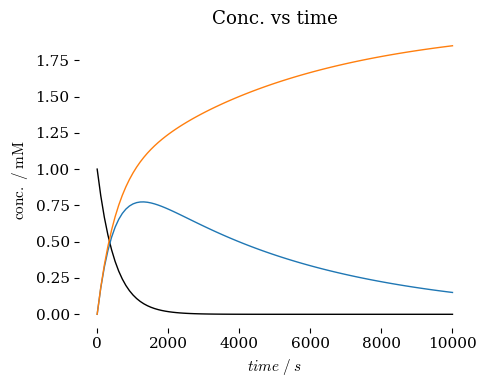

In [36]:
### from StealThisCode/4_SciPy/K05_NumericIntegration_SystemEq.ipynb

#######################
### import packages 
#######################

import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

############################################
### Create a function that describes the 
### system of differential equations. 
############################################

#display(A.rhs,I.rhs,P.rhs)

fA = sym.lambdify([t, A0, k1], A.rhs)   
fI = sym.lambdify([t, A0, k1, k2], I.rhs)
fP = sym.lambdify([t, A0, k1, k2], P.rhs)

############################################
### Parameters and experimental conditions
############################################

k_1 = 2e-3          ### Values for kinetic parameters
k_2 = 2e-4
A0_conc = 1

time_end = 10000   ### The end time
n_points = 100   ### number of points - increase if needed

#########################################
### Create series of time points      
#########################################

time = np.linspace(0, time_end, n_points) ### time vector (list of time points)

##################################################################################
### Plot the results
##################################################################################

plt.rcdefaults()                    ### resets the plot defaults so we always start in the same place
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

#########################################
### Plot the line using the x_fit, y_fit points
#########################################
x = time      
y = fA(time, A0_conc, k_1) 
ax.plot(x, y, 
        linestyle = '-',            ### use a line between points
 #       linewidth='0.5',            ### make the line thin
        color = 'C0',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )

x = time      
y = fI(time, A0_conc, k_1, k_2) 
ax.plot(x, y, 
        linestyle = '-',            ### use a line between points
 #       linewidth='0.5',            ### make the line thin
        color = 'C1',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )

x = time      
y = fP(time, A0_conc, k_1, k_2) 
ax.plot(x, y, 
        linestyle = '-',            ### use a line between points
 #       linewidth='0.5',            ### make the line thin
        color = 'C2',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )
#########################################
### Add more style
#########################################
        
ax.set(ylabel=r"$\rm conc.\;/\;mM $", 
        xlabel=r"$time\; /\; s$",
        title = "Conc. vs time",
        xlim=[None, None],      
        ylim=[None, None])


fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.savefig("plot.pdf")    # use this to save the figure in PDF format
plt.show()                 # output the combined four plots

# r_I and r_P are the relative extinction coefficients for A and I w.r.t. A

### Absorbance Plot

Here is the same again but presenting the absorbances.

